# import libaries 

In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.
from sklearn import metrics

In [72]:
%pip install seaborn

# Load data

In [73]:
data = pd.read_csv("marksheet.csv")

# EDA

In [74]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   id     Name  Gender  Age Section  Science  English  History  Maths
0   1  Bronnie  Female   13       C       21       81       62     49
1   2   Lemmie    Male   15       B       29       41       17     40
2   3    Danya  Female   14       C       12       87       16     96
3   4    Denna  Female   14       B       15       53       82     33
4   5  Jocelin    Male   14       A       43        6        3     21


In [75]:
# Summary statistics of numerical columns

print("\nSummary statistics:")
print(data.describe())


Summary statistics:
               id         Age     Science     English     History       Maths
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000
mean   125.500000   14.020000   51.440000   47.980000   52.272000   53.016000
std     72.312977    0.823598   29.314497   29.949013   26.868526   27.386416
min      1.000000   13.000000    1.000000    1.000000    1.000000    1.000000
25%     63.250000   13.000000   25.250000   20.250000   31.000000   30.000000
50%    125.500000   14.000000   53.000000   47.500000   53.000000   52.500000
75%    187.750000   15.000000   78.000000   74.000000   76.000000   76.000000
max    250.000000   15.000000  100.000000  100.000000  100.000000  100.000000


In [76]:
# Data types and non-null counts

print("\nData types and non-null counts:")
print(data.info())



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       250 non-null    int64 
 1   Name     250 non-null    object
 2   Gender   250 non-null    object
 3   Age      250 non-null    int64 
 4   Section  250 non-null    object
 5   Science  250 non-null    int64 
 6   English  250 non-null    int64 
 7   History  250 non-null    int64 
 8   Maths    250 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 14.7+ KB
None


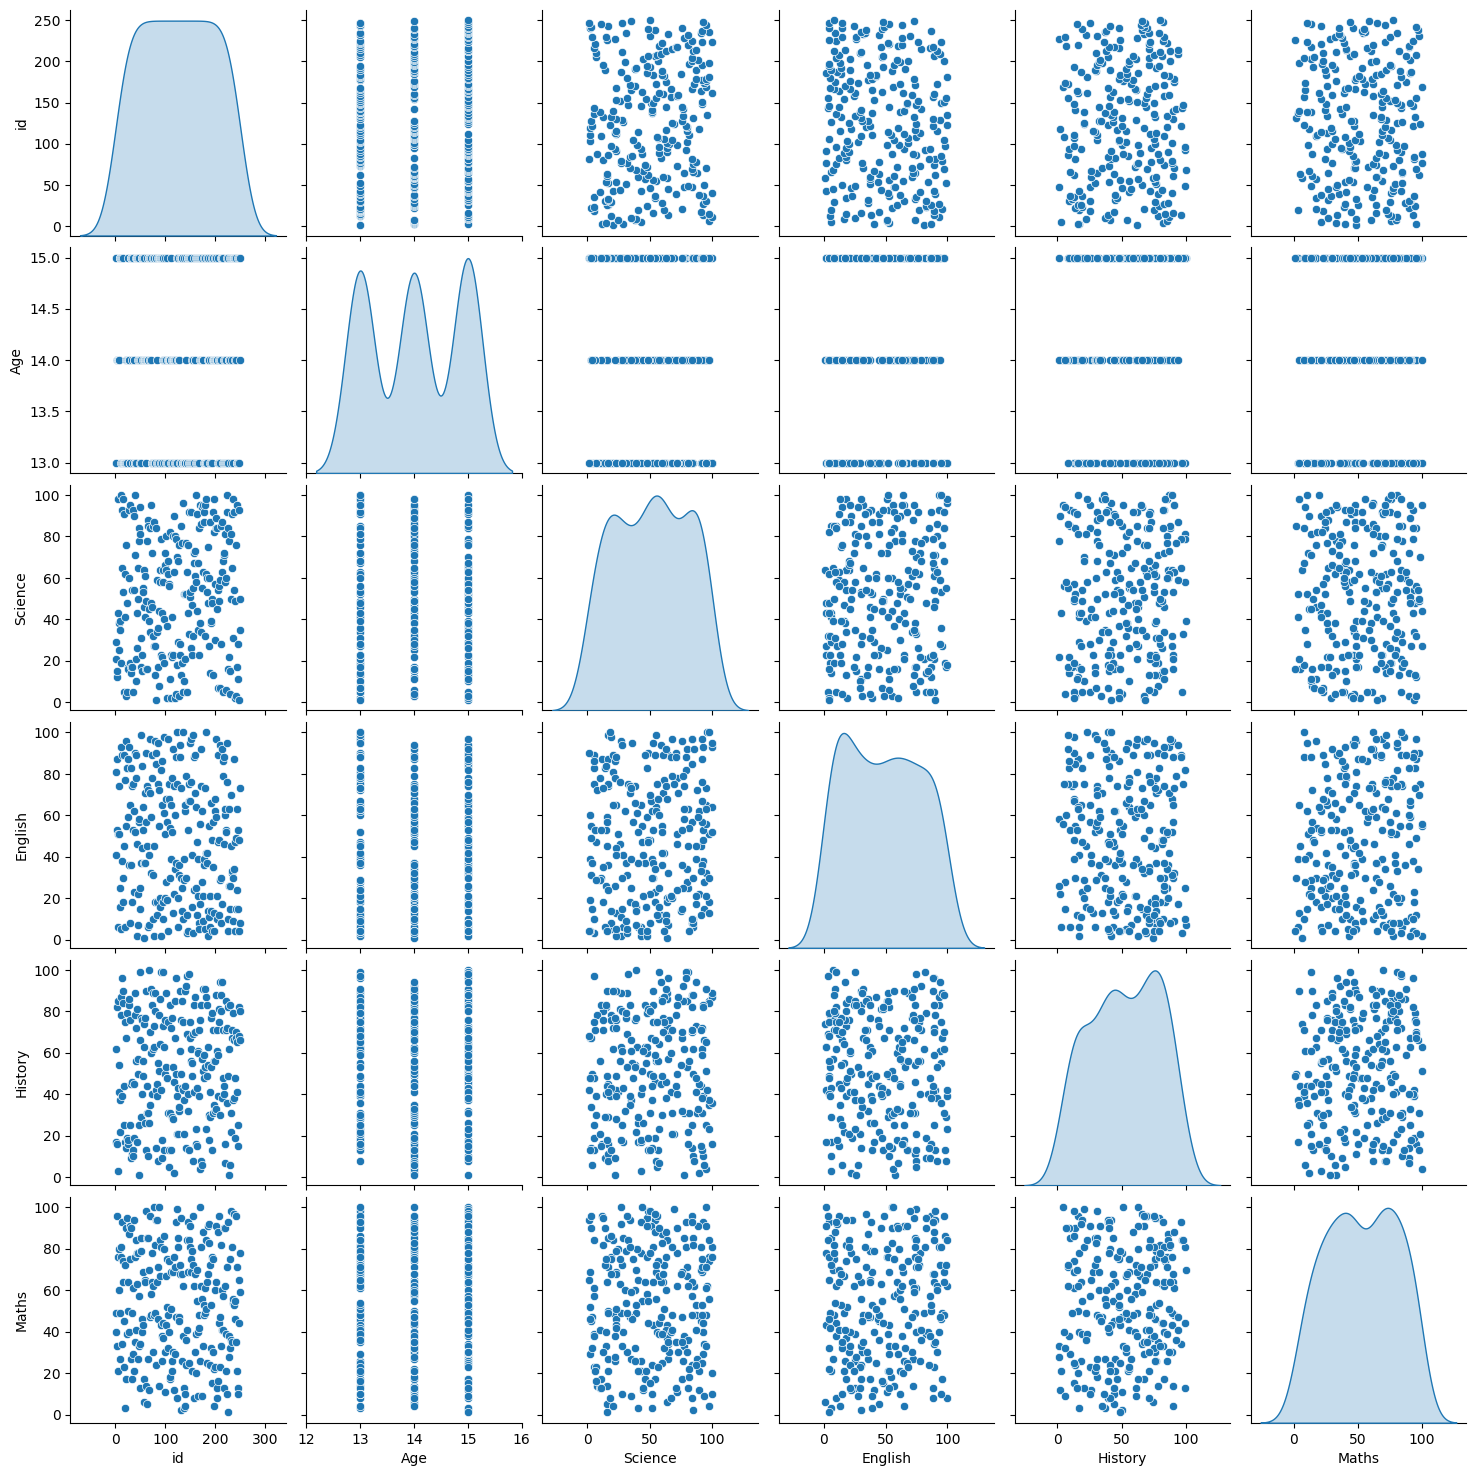

In [77]:
# Pairplot for numerical columns (scatter plots and histograms)

sns.pairplot(data, diag_kind="kde")
plt.show()

<ipython-input-78-a1c8e0e5d005>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


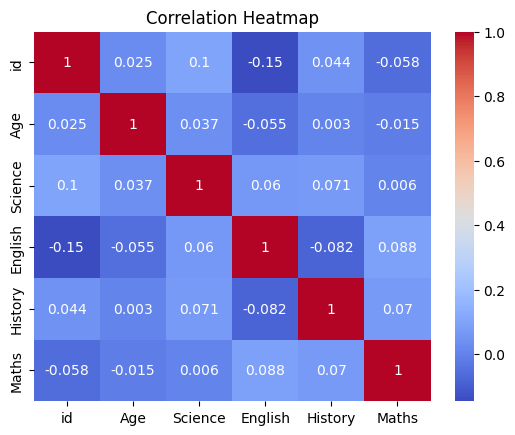

In [78]:
# Correlation heatmap for numerical columns

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

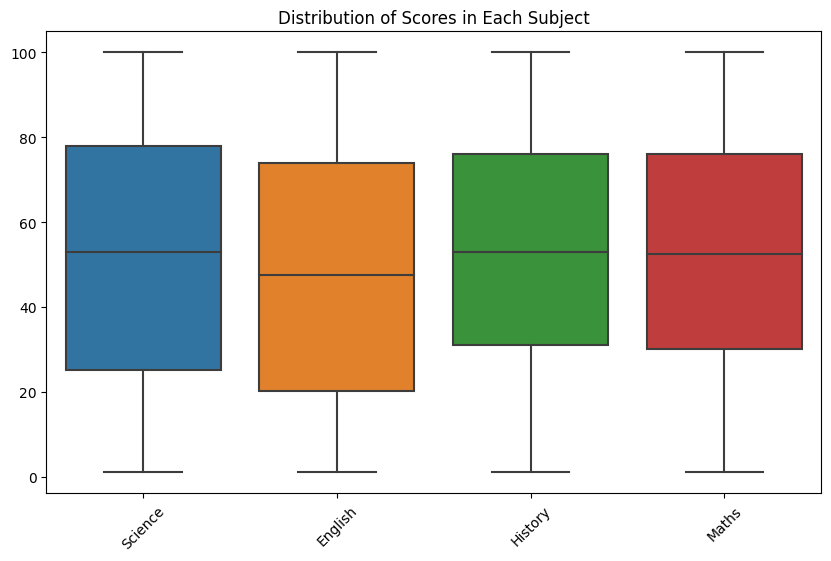

In [79]:
# Distribution of scores in each subject using boxplots

plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(["id", "Age"], axis=1))
plt.title("Distribution of Scores in Each Subject")
plt.xticks(rotation=45)
plt.show()

<ipython-input-80-4e6483f31e52>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="Gender", y=subject, ci=None)
<ipython-input-80-4e6483f31e52>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="Gender", y=subject, ci=None)
<ipython-input-80-4e6483f31e52>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="Gender", y=subject, ci=None)
<ipython-input-80-4e6483f31e52>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="Gender", y=subject, ci=None)


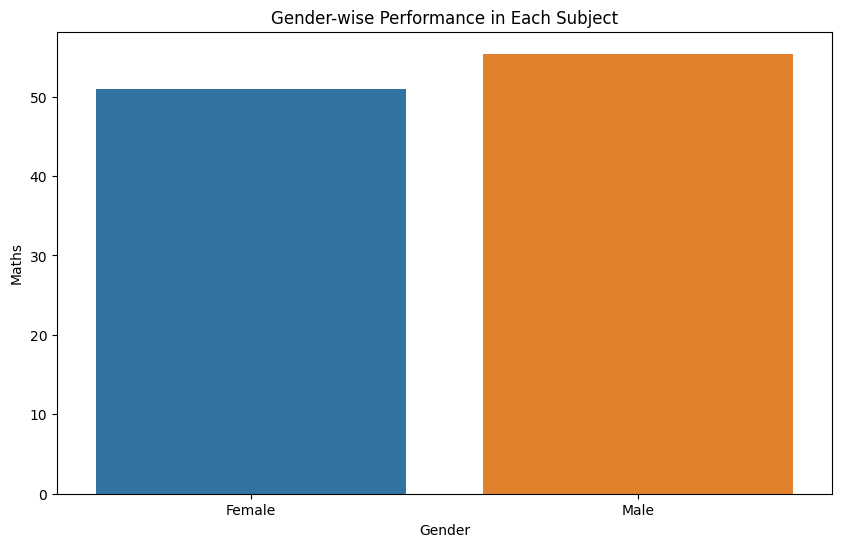

In [80]:
# Gender-wise performance in each subject using bar plots

gender_subjects = ["Science", "English", "History", "Maths"]
plt.figure(figsize=(10, 6))
for subject in gender_subjects:
    sns.barplot(data=data, x="Gender", y=subject, ci=None)
plt.title("Gender-wise Performance in Each Subject")
plt.show()

In [81]:
# Define the target variable (y) and input features (X)

target_variable = "Maths"
input_features = ["Science", "English", "History"]

X = data[input_features]
y = data[target_variable]

# Prepare data for ML model

In [82]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Print the shapes of the data subsets

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (200, 3)
Shape of y_train: (200,)
Shape of X_test: (50, 3)
Shape of y_test: (50,)


In [ ]:
# Initialize the Linear Regression model


In [90]:
model = LinearRegression()

In [85]:
# Train the model using the training data

model.fit(X_train, y_train)

LinearRegression()

In [86]:
# Interpret the coefficients

coefficients = pd.DataFrame({'Feature': input_features, 'Coefficient': model.coef_})
print(coefficients)

   Feature  Coefficient
0  Science    -0.015771
1  English     0.046775
2  History     0.060177


In [87]:
# Make predictions on the test data

y_pred = model.predict(X_test) 
y_pred

array([54.15079878, 54.36371153, 54.26569663, 56.08189854, 56.18723015,
       54.47427056, 49.42081844, 50.97370255, 51.09605667, 53.58230809,
       56.76008036, 53.89632975, 53.15729446, 51.96754439, 53.98220662,
       52.32963055, 53.95680156, 54.23544952, 51.59274668, 53.01623537,
       53.96512197, 48.90916464, 50.18242048, 55.676887  , 52.03551829,
       51.50147057, 52.84399028, 56.26046474, 52.45520908, 56.89938499,
       51.59403393, 51.01057775, 56.26924696, 50.88428618, 51.8426742 ,
       55.26250277, 55.3892507 , 50.51591316, 52.76807489, 55.66542944,
       55.0589393 , 53.31868062, 54.47660024, 51.3798285 , 54.68880637,
       51.56959931, 57.13714833, 53.14310214, 48.44037676, 56.03591074])

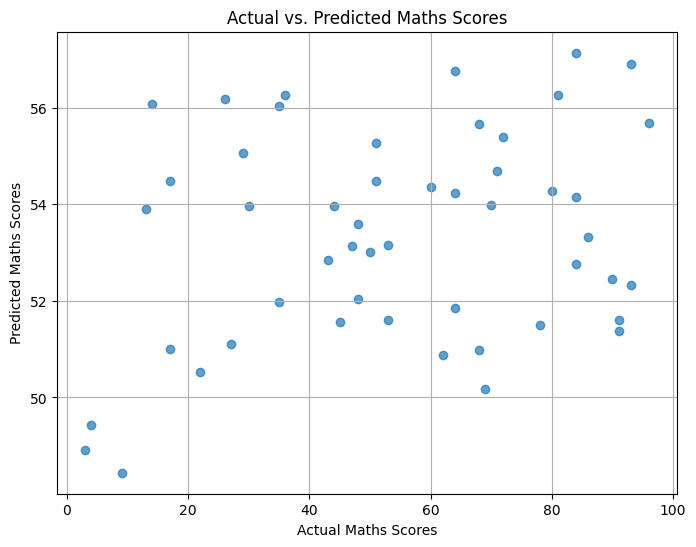

In [88]:
# Create a scatter plot of actual vs. predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Maths Scores")
plt.ylabel("Predicted Maths Scores")
plt.title("Actual vs. Predicted Maths Scores")
plt.grid(True)
plt.show()

# Evaluate the model

In [91]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 

# Calculate RMSE by taking the square root of MSE

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 671.7932018783332
Root Mean Squared Error: 25.918973781350473
R-squared Score: 0.03521292759064276
